The section Dataset Descriptive contains the functions for basic dataset descriptives:
- Data Size
- Text Length
- Time period (for paper abstracts)

In [ ]:
import pandas as pd

# Load the CSV file (update the file path if necessary)
file_path = 'filtered_arxiv_metadata_2024.csv'
arxiv_data = pd.read_csv(file_path)

# Convert the 'update_date' column to datetime format
arxiv_data['update_date'] = pd.to_datetime(arxiv_data['update_date'])

# Get the minimum and maximum dates to determine the time period
min_date = arxiv_data['update_date'].min()
max_date = arxiv_data['update_date'].max()

# Print the time period
print(f"The dataset covers the time period from {min_date.date()} to {max_date.date()}.")


The dataset covers the time period from 2024-01-01 to 2024-08-16.


In [ ]:
arxiv_data

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,806.1636,Ian Pratt-Hartmann,Ian Pratt-Hartmann,Data-Complexity of the Two-Variable Fragment w...,NaN,"Information and Computation, 207(8), 2009, pp....",10.1016/j.ic.2009.02.004,NaN,cs.LO cs.AI cs.CC,http://arxiv.org/licenses/nonexclusive-distrib...,The data-complexity of both satisfiability a...,"[{'version': 'v1', 'created': 'Tue, 10 Jun 200...",2024-04-19,"[['Pratt-Hartmann', 'Ian', '']]"
1,808.0521,Ian Pratt-Hartmann,Ian Pratt-Hartmann and Lawrence S. Moss,Logics for the Relational Syllogistic,NaN,"Review of Symbolic Logic, 2(4), 2009, pp. 647-...",10.1017/S1755020309990086,NaN,cs.LO cs.CC cs.CL,http://arxiv.org/licenses/nonexclusive-distrib...,The Aristotelian syllogistic cannot account ...,"[{'version': 'v1', 'created': 'Mon, 4 Aug 2008...",2024-04-24,"[['Pratt-Hartmann', 'Ian', ''], ['Moss', 'Lawr..."
2,905.3108,Ian Pratt-Hartmann,Yevgeny Kazakov and Ian Pratt-Hartmann,A Note on the Complexity of the Satisfiability...,Full proofs for paper presented at the IEEE Co...,"Proceedings, 24th Annual IEEE Symposium on Log...",10.1109/LICS.2009.17,NaN,cs.LO cs.AI cs.CC,http://arxiv.org/licenses/nonexclusive-distrib...,Graded modal logic is the formal language ob...,"[{'version': 'v1', 'created': 'Tue, 19 May 200...",2024-04-24,"[['Kazakov', 'Yevgeny', ''], ['Pratt-Hartmann'..."
3,1104.2444,Claus-Peter Wirth,Claus-Peter Wirth,A Simplified and Improved Free-Variable Framew...,ii + 114 pages,IfCoLog Journal of Logics and their Applicatio...,NaN,SEKI Report SR-2011-01,cs.AI math.LO,http://arxiv.org/licenses/nonexclusive-distrib...,Free variables occur frequently in mathemati...,"[{'version': 'v1', 'created': 'Wed, 13 Apr 201...",2024-05-30,"[['Wirth', 'Claus-Peter', '']]"
4,1203.055,Afshin Rostamizadeh,"Corinna Cortes, Mehryar Mohri, Afshin Rostamiz...",Algorithms for Learning Kernels Based on Cente...,NaN,Journal of Machine Learning Research 13 (2012)...,NaN,NaN,cs.LG cs.AI,http://arxiv.org/licenses/nonexclusive-distrib...,This paper presents new and effective algori...,"[{'version': 'v1', 'created': 'Fri, 2 Mar 2012...",2024-05-01,"[['Cortes', 'Corinna', ''], ['Mohri', 'Mehryar..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54942,2408.08313,Weiyang Liu,"Zeju Qiu, Weiyang Liu, Haiwen Feng, Zhen Liu, ...",Can Large Language Models Understand Symbolic ...,"Technical Report v1 (44 pages, 23 figures, pro...",NaN,NaN,NaN,cs.LG cs.AI cs.CL cs.CV,http://arxiv.org/licenses/nonexclusive-distrib...,Assessing the capabilities of large language...,"[{'version': 'v1', 'created': 'Thu, 15 Aug 202...",2024-08-16,"[['Qiu', 'Zeju', ''], ['Liu', 'Weiyang', ''], ..."
54943,cs/0512102,Andrij Rovenchak,Solomija Buk and Andrij Rovenchak,"Statistical Parameters of the Novel ""Perekhres...",11 pages,Quantitative Linguistics 62: Exact methods in ...,10.1515/9783110894219.39,NaN,cs.CL,NaN,"In the paper, a complex statistical characte...","[{'version': 'v1', 'created': 'Wed, 28 Dec 200...",2024-01-04,"[['Buk', 'Solomija', ''], ['Rovenchak', 'Andri..."
54944,cs/0701039,Ian Pratt-Hartmann,Ian Pratt-Hartmann,On the Complexity of the Numerically Definite ...,24 pages 1 figure,"Bulletin of Symbolic Logic, 14(1), 2008, pp. 1...",10.2178/bsl/1208358842,NaN,cs.LO cs.AI cs.CC,NaN,"In this paper, we determine the complexity o...","[{'version': 'v1', 'created': 'Sat, 6 Jan 2007...",2024-04-19,"[['Pratt-Hartmann', 'Ian', '']]"
54945,cs/0701194,Andrij Rovenchak,Solomija Buk and Andrij Rovenchak,Menzerath-Altmann Law for Syntactic Structures...,8 pages; submitted to the Proceedings of the I...,"Glottotheory. Vol. 1, No. 1, pp 10-17 (2008)",10.1515/glot-2008-0002,NaN,cs.CL,NaN,"In the paper, the definition of clause suita...","[{'version': 'v1', 'created': 'Tue, 30 Jan 200...",2024-01-04,"[['Buk', 'Solomija', ''], ['Rovenchak', 'Andri..."


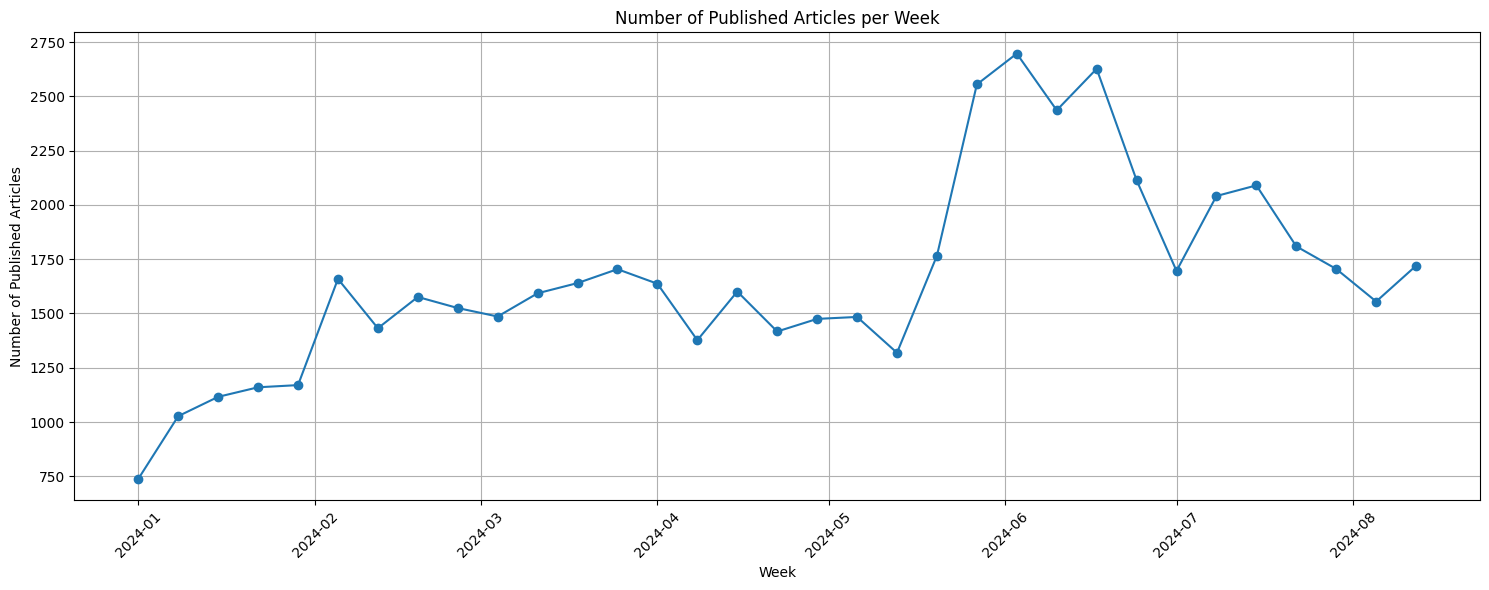

In [ ]:
import matplotlib.pyplot as plt

# Group the data by week and count the number of articles
arxiv_data['week'] = arxiv_data['update_date'].dt.to_period('W').apply(lambda r: r.start_time)
articles_per_week = arxiv_data['week'].value_counts().sort_index()

# Plot the number of published articles per week
plt.figure(figsize=(15, 6))
plt.plot(articles_per_week.index, articles_per_week.values, marker='o', linestyle='-')
plt.xlabel('Week')
plt.ylabel('Number of Published Articles')
plt.title('Number of Published Articles per Week')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

The dataset covers the time period from 2024-01-01 to 2024-08-16.


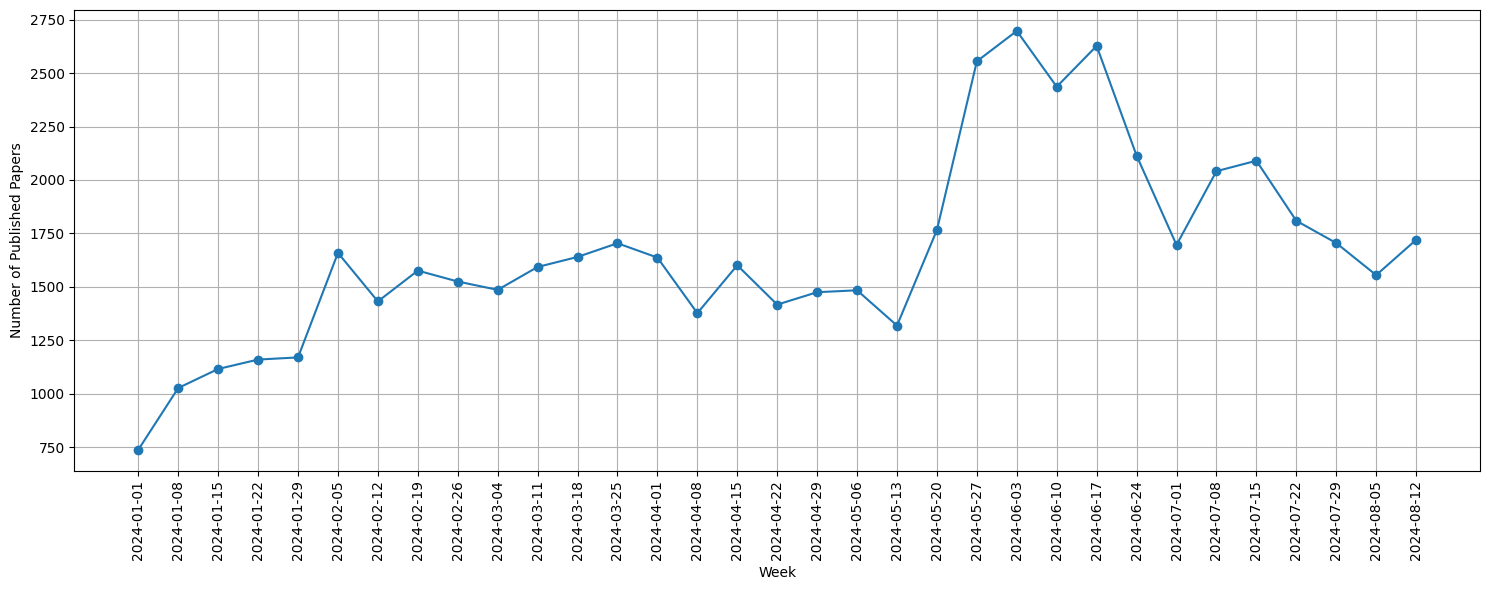

In [ ]:
# Print the time period
print(f"The dataset covers the time period from {min_date.date()} to {max_date.date()}.")

# Group the data by week and count the number of articles
arxiv_data['week'] = arxiv_data['update_date'].dt.to_period('W').apply(lambda r: r.start_time)
articles_per_week = arxiv_data['week'].value_counts().sort_index()

# Plot the number of published articles per week
plt.figure(figsize=(15, 6))
plt.plot(articles_per_week.index, articles_per_week.values, marker='o', linestyle='-')
plt.xlabel('Week')
plt.ylabel('Number of Published Papers')
plt.title('The Number of Weekly Published Research Papers on ArXiv between 2024-01-01 and 2024-08-16')

# Set the x-axis ticks to show all weeks and rotate them to 90 degrees
plt.xticks(articles_per_week.index, rotation=90)

plt.grid(True)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('articles_per_week.png')

# Display the plot
plt.show()

In [3]:
# Ensure that the 'abstract' column exists and is not empty
if 'abstract' in arxiv_data.columns:
    # Count the number of words in each abstract
    arxiv_data['word_count'] = arxiv_data['abstract'].apply(lambda x: len(str(x).split()))

    # Calculate the average word count
    avg_word_count = arxiv_data['word_count'].mean()

    # Print the result
    print(f"The average number of words in the abstract column is {avg_word_count:.2f}.")
else:
    print("The 'abstract' column does not exist in the dataset.")

The average number of words in the abstract column is 175.42.
